In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#### Import and clean up data

In [3]:
# File is hourly productivity as a % change from the previous year

global_temps = pd.read_csv('data/GlobalTemperatures.csv', header=0)
#global_temps

global_temps.dropna(inplace=True)
global_temps['dt'] = pd.to_datetime(global_temps['dt'], format='mixed')
global_temps.set_index(['dt'], inplace=True)
global_temps.dtypes

LandAverageTemperature    float64
dtype: object

#### Create train and test sets

In [7]:
global_temps_train = global_temps['1800-01-01':'2013-12-01']
global_temps_test = global_temps['2014-01-01':]

#### ADFuller test for stationarity

In [8]:
adfuller(global_temps_train)
#Fails @ 5% so it is not stationary

(-2.2218764155332105,
 0.19840159667991814,
 23,
 2544,
 {'1%': -3.432923078043983,
  '5%': -2.8626767808549087,
  '10%': -2.56737515100891},
 3753.403954861341)

#### Examine acf and pacf

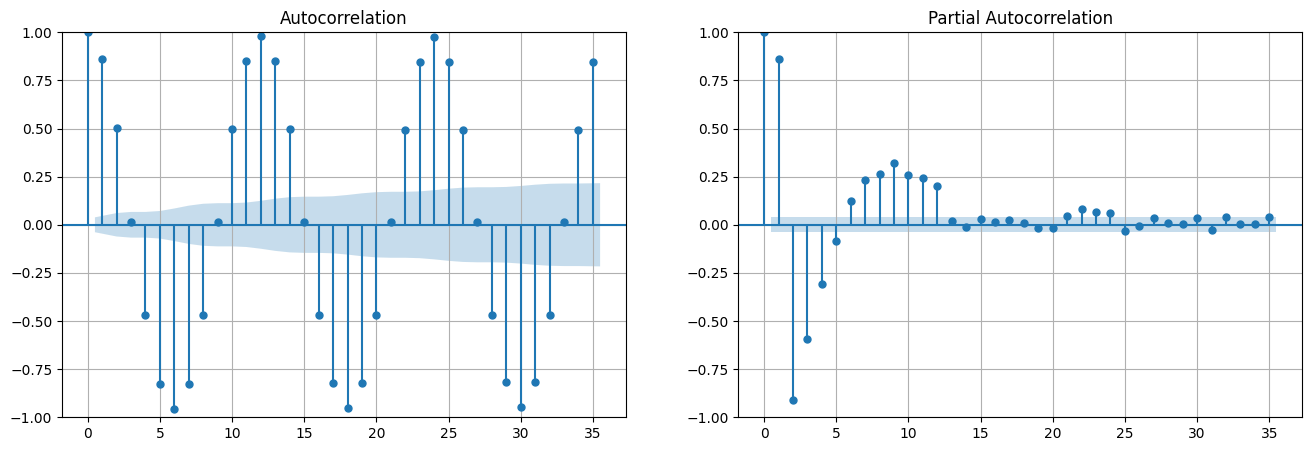

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(global_temps_train, ax = ax[0]);
ax[0].grid()
plot_pacf(global_temps_train, ax = ax[1], method = 'ywm');
ax[1].grid()

#### Create ARMA model

Mean Absolute Error: 3.8176632177041157
Root Mean Squared Error: 4.477546817876987


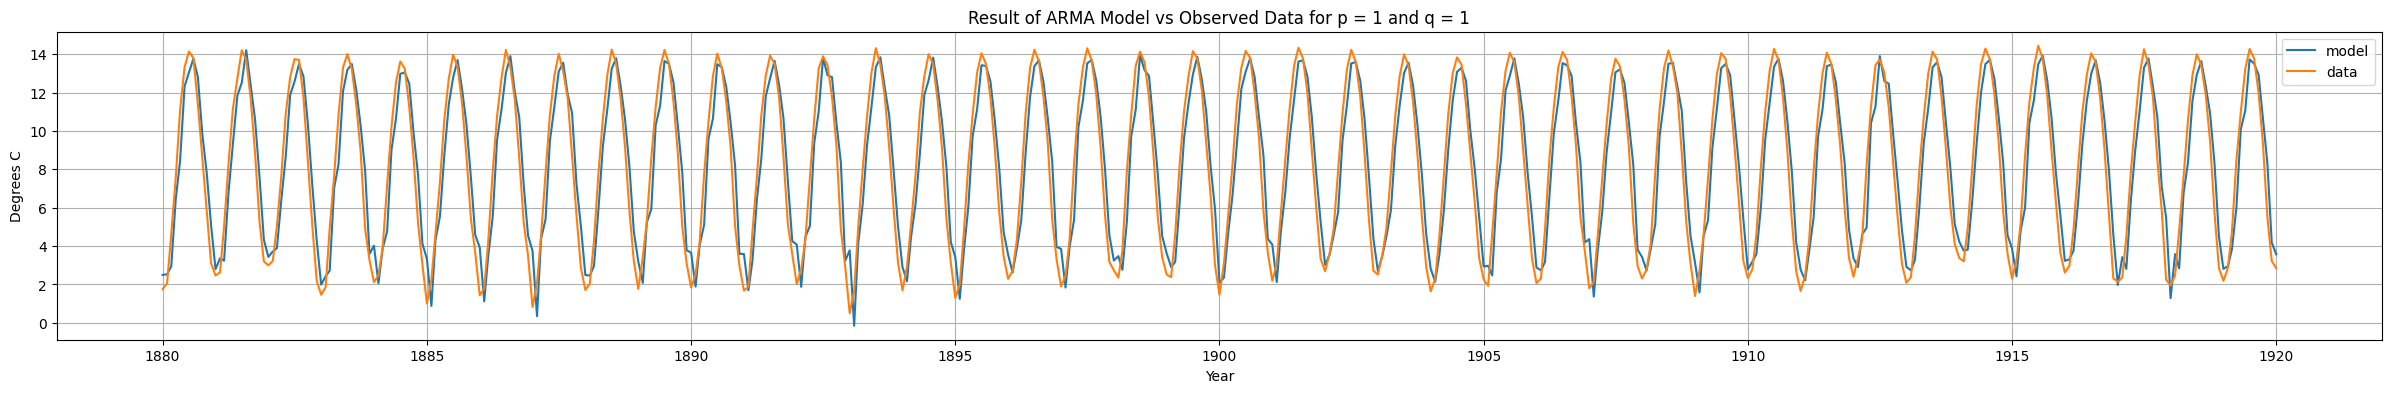

In [31]:
num = (1,0,1)
arma = ARIMA(global_temps_train, order = num).fit()
hist_preds = arma.predict()
plt.figure(figsize = (30, 4))
plt.plot(hist_preds['1880-01-01':'1920-01-01'], label = 'model')
plt.plot(global_temps_train['1880-01-01':'1920-01-01'], label = 'data')
plt.legend()
plt.grid()
plt.title(f'Result of ARMA Model vs Observed Data for p = {num[0]} and q = {num[2]}');
plt.xlabel('Year')
plt.ylabel('Degrees C')

forecast = arma.forecast(steps = len(global_temps_test))
pred_error = global_temps_test.LandAverageTemperature - forecast
mae = np.abs(pred_error).mean()
rmse = np.sqrt((pred_error**2).mean())
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.3211234957834097
Root Mean Squared Error: 1.5228481248413488


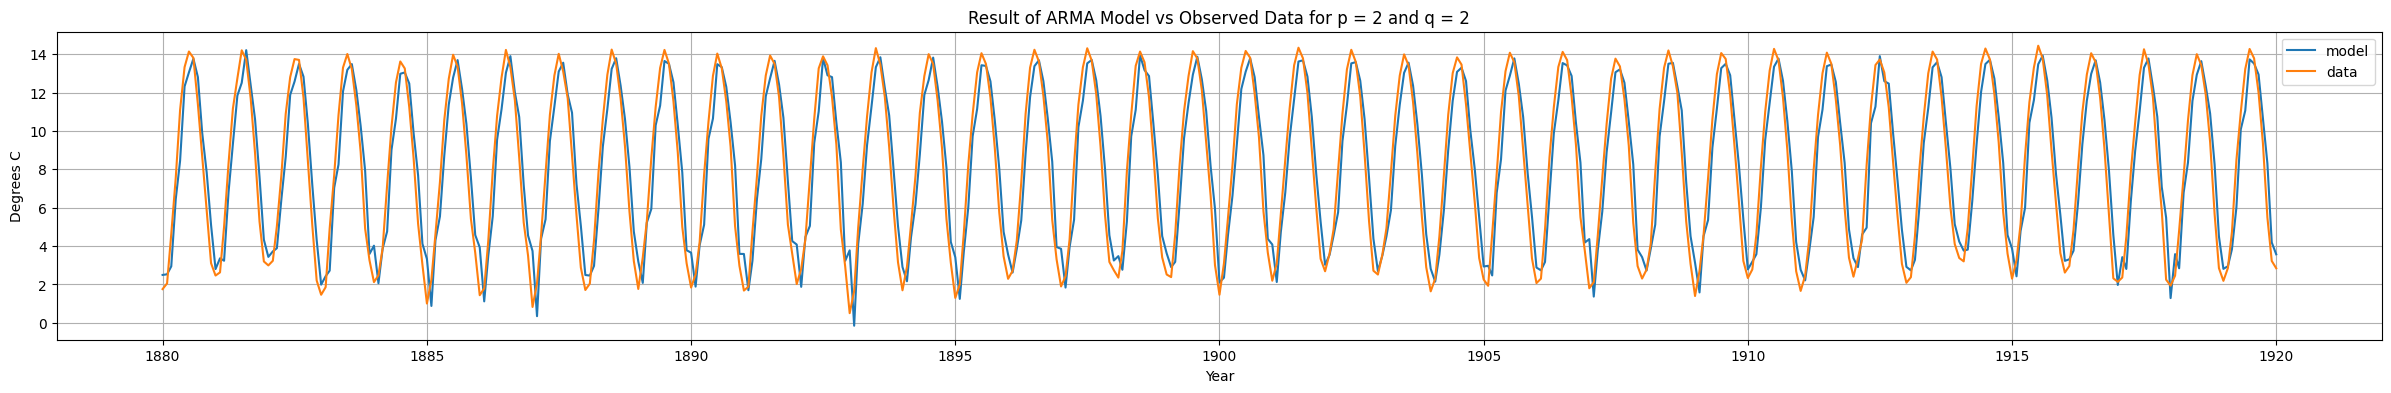

In [30]:
num2 = (2,0,2)
arma2 = ARIMA(global_temps_train, order = num2).fit()
hist_preds2 = arma2.predict()
plt.figure(figsize = (30, 4))
plt.plot(hist_preds['1880-01-01':'1920-01-01'], label = 'model')
plt.plot(global_temps_train['1880-01-01':'1920-01-01'], label = 'data')
plt.legend()
plt.grid()
plt.title(f'Result of ARMA Model vs Observed Data for p = {num2[0]} and q = {num2[2]}');
plt.xlabel('Year')
plt.ylabel('Degrees C')

forecast2 = arma2.forecast(steps = len(global_temps_test))
pred_error2 = global_temps_test.LandAverageTemperature - forecast2
mae = np.abs(pred_error2).mean()
rmse = np.sqrt((pred_error2**2).mean())
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.34134582054591417
Root Mean Squared Error: 0.4164161855500766


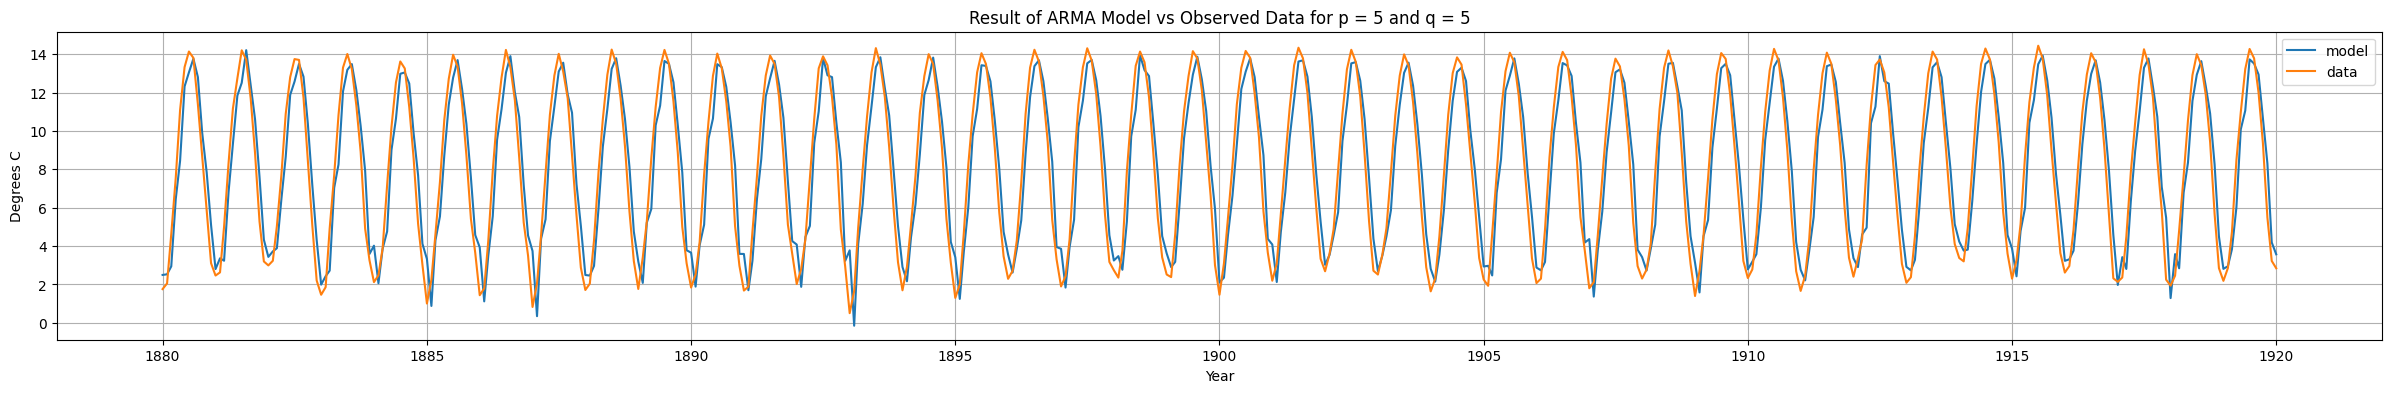

In [29]:
num3 = (5,0,5)
arma3 = ARIMA(global_temps_train, order = num3).fit()
hist_preds3 = arma3.predict()
plt.figure(figsize = (30, 4))
plt.plot(hist_preds['1880-01-01':'1920-01-01'], label = 'model')
plt.plot(global_temps_train['1880-01-01':'1920-01-01'], label = 'data')
plt.legend()
plt.grid()
plt.title(f'Result of ARMA Model vs Observed Data for p = {num3[0]} and q = {num3[2]}');
plt.xlabel('Year')
plt.ylabel('Degrees C')

forecast3 = arma3.forecast(steps = len(global_temps_test))
pred_error3 = global_temps_test.LandAverageTemperature - forecast3
mae = np.abs(pred_error3).mean()
rmse = np.sqrt((pred_error3**2).mean())
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.465644954205766
Root Mean Squared Error: 1.8482315892256982


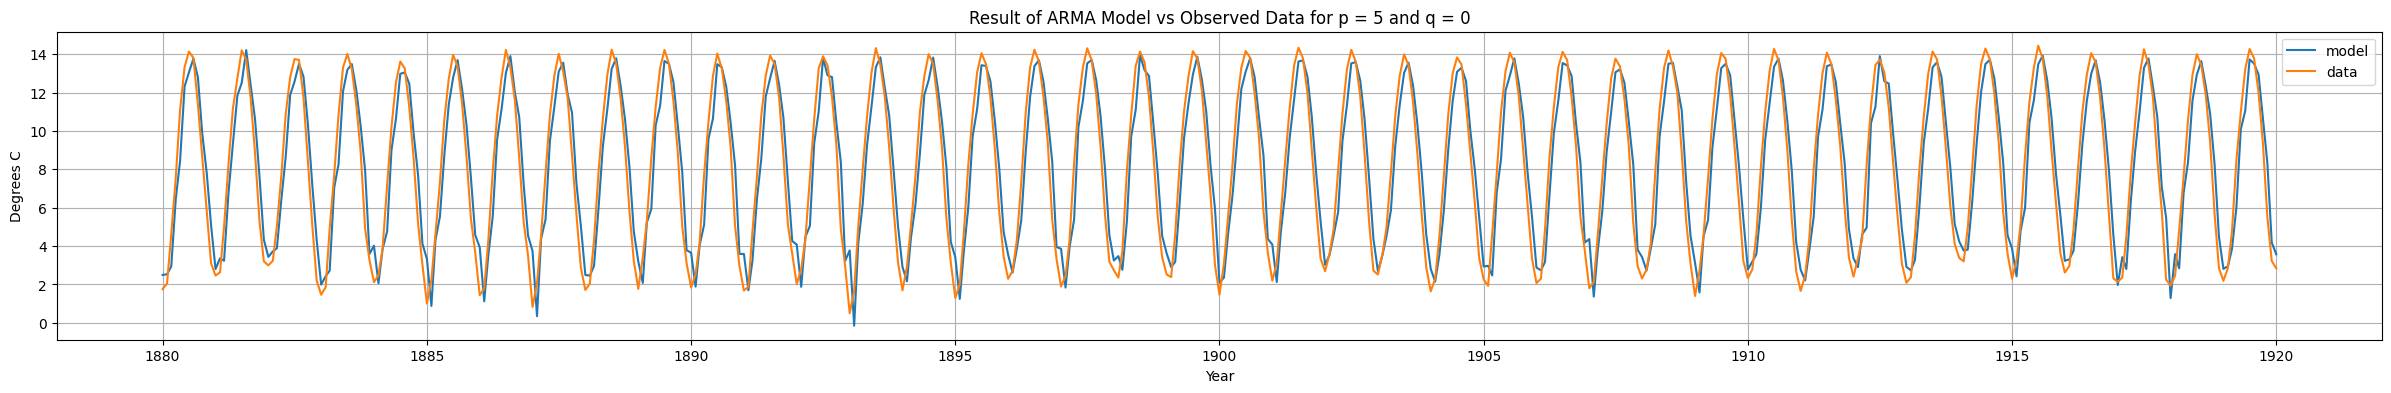

In [28]:
num4 = (5,0,0)
arma4 = ARIMA(global_temps_train, order = num4).fit()
hist_preds4 = arma4.predict()
plt.figure(figsize = (30, 4))
plt.plot(hist_preds['1880-01-01':'1920-01-01'], label = 'model')
plt.plot(global_temps_train['1880-01-01':'1920-01-01'], label = 'data')
plt.legend()
plt.grid()
plt.title(f'Result of ARMA Model vs Observed Data for p = {num4[0]} and q = {num4[2]}');
plt.xlabel('Year')
plt.ylabel('Degrees C')

forecast4 = arma4.forecast(steps = len(global_temps_test))
pred_error4 = global_temps_test.LandAverageTemperature - forecast4
mae = np.abs(pred_error4).mean()
rmse = np.sqrt((pred_error4**2).mean())
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 3.5375234115597074
Root Mean Squared Error: 4.111608016134334


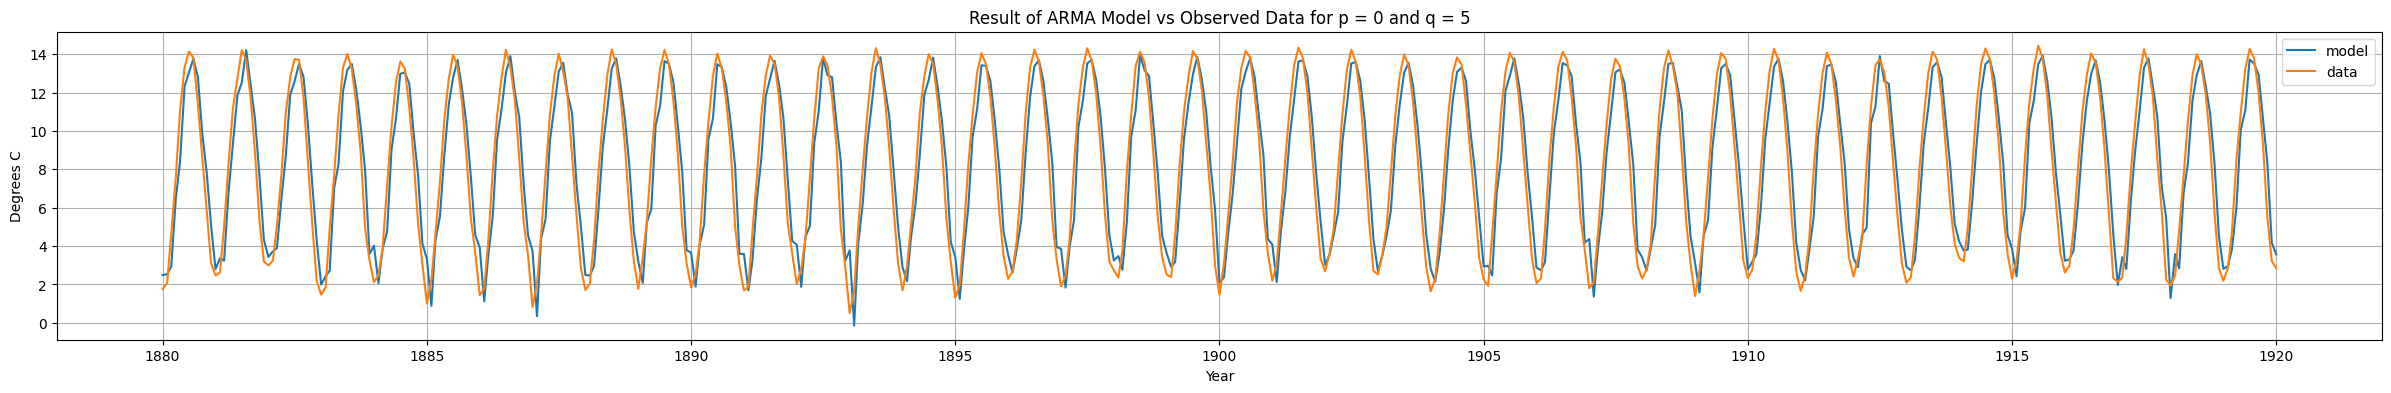

In [25]:
num5 = (0,0,5)
arma5 = ARIMA(global_temps_train, order = num5).fit()
hist_preds5 = arma5.predict()
plt.figure(figsize = (30, 4))
plt.plot(hist_preds['1880-01-01':'1920-01-01'], label = 'model')
plt.plot(global_temps_train['1880-01-01':'1920-01-01'], label = 'data')
plt.legend()
plt.grid()
plt.title(f'Result of ARMA Model vs Observed Data for p = {num5[0]} and q = {num5[2]}');
plt.xlabel('Year')
plt.ylabel('Degrees C')

forecast5 = arma5.forecast(steps = len(global_temps_test))
pred_error5 = global_temps_test.LandAverageTemperature - forecast5
mae = np.abs(pred_error5).mean()
rmse = np.sqrt((pred_error5**2).mean())
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.31462065699273295
Root Mean Squared Error: 0.3907513310193519


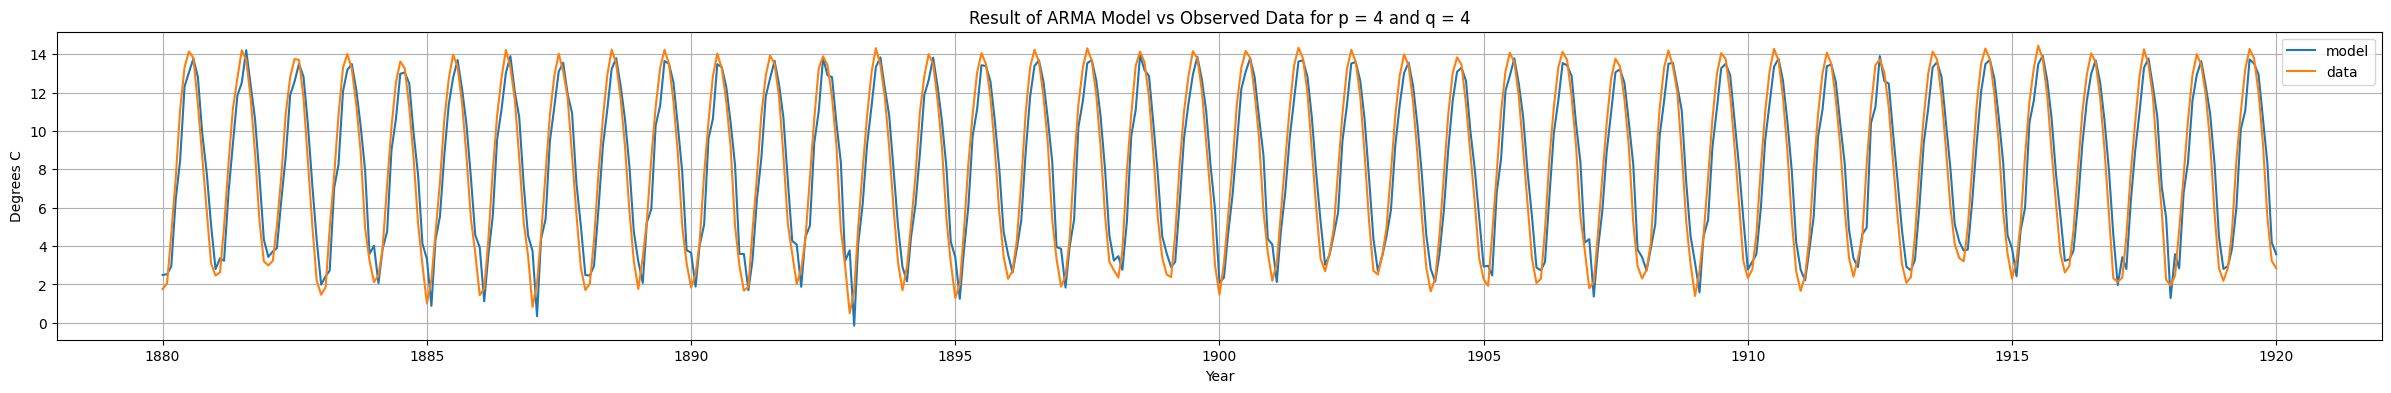

In [45]:
num6 = (4,0,4)
arma6 = ARIMA(global_temps_train, order = num6).fit()
hist_preds6 = arma6.predict()
plt.figure(figsize = (30, 4))
plt.plot(hist_preds['1880-01-01':'1920-01-01'], label = 'model')
plt.plot(global_temps_train['1880-01-01':'1920-01-01'], label = 'data')
plt.legend()
plt.grid()
plt.title(f'Result of ARMA Model vs Observed Data for p = {num6[0]} and q = {num6[2]}');
plt.xlabel('Year')
plt.ylabel('Degrees C')

forecast6 = arma6.forecast(steps = len(global_temps_test))
pred_error6 = global_temps_test.LandAverageTemperature - forecast6
mae = np.abs(pred_error6).mean()
rmse = np.sqrt((pred_error6**2).mean())
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')